## Introduction to Linear Regression

Previously we have look at linear regression in terms of summarizing a relationship between to quantitative variables.  Now we are going to take a deeper dive into linear regression as a model.

We are going to use a new package called 's k learn' though if you need to install it you use 'scikit-learn'.  This package will have many of the models that we will use going forward.

In [408]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
import scipy.stats as st
import statsmodels.api as sm 
import pylab as py 

# sklearn is new and you may have to install it but the code is 
# pip3 install scikit-learn
from sklearn.linear_model import LinearRegression

We are going to start with the monkey data.

In [409]:
# read in the monkey data
monkey = pd.read_csv("https://webpages.charlotte.edu/mschuck1/classes/DTSC2301/Data/monkey.csv")
# get info about these data
monkey.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     20 non-null     float64
 1   pf      20 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 452.0 bytes


Reminder that these data are the age of the monkeys in years (*age*) and the number of primordial follicles that a female monkey has (*pf*).

Next we will plot the data.

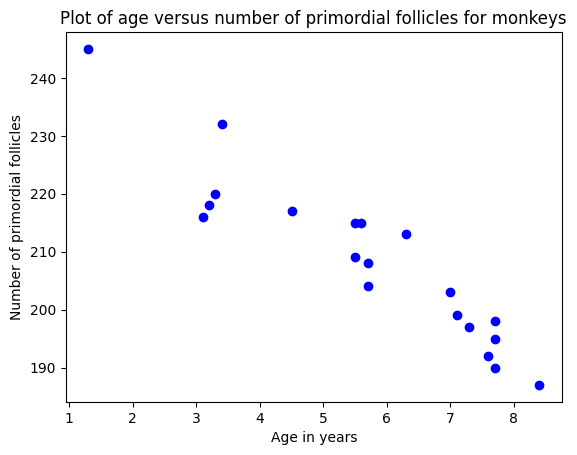

In [410]:
plt.scatter( monkey['age'],monkey['pf'], color="blue")

# Add labels and title
plt.xlabel('Age in years')
plt.ylabel('Number of primordial follicles')
plt.title('Plot of age versus number of primordial follicles for monkeys')
plt.show()

The relationship here is negative and seems linear.

### Fitting the model

Below we have the code for specifying the model, then fitting the model to the data.

In [411]:
# In sklearn we first need to create a model object 
# and here it is a linear regression
model= LinearRegression()
# note below that the x needs to be a two dimensional array so we 
# need the double brackets here
x=monkey[['age']]
# y needs to be a one dimensional array so single brackets work
y=monkey['pf']
model.fit(x, y)

LinearRegression()

### Assessment 
There are two types of assessment for a model.  First we assess whether or not the data is appropriate for the model requirements/conditions or assumptions.  Second, we evaluate how well the model performs.  

For the former when we are using a the linear model, the relationship with our variables should be linear and the variability about the line should be consistent.  There is another condition that the errors/residuals should be approximately Gaussian or Normally distributed.  This last condition is only important if the number of observations is small.

#### Model Conditions

To evaluate the model conditions above we use the residuals.  The word residual means leftover and in regression we use it to me the values for the target/response, y, which are left over after getting the predicted values, $\hat{y}$, for y. So mathematically, the
residuals, usually denoted by $e$ are calculated to be $y -\hat{y}$.  

The first plot we look at is a plot of residuals versus fitted values. In this plot we are looking for no relationship between the residuals (y-axis) and the predicted values (x-axis).  Having no relationship means that there is no relationship in the values that are left after we fit the model.  Additionally in this plot it is important that we should have the variability in the vertical direction being roughly the same across the different predicted values.  
  

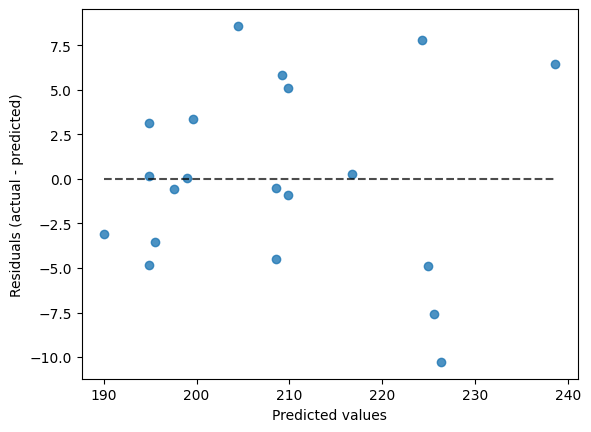

In [412]:
from sklearn.metrics import PredictionErrorDisplay
# the code below get the predict values for all of the values in x
y_hat = model.predict(x)
# below makes a 
display = PredictionErrorDisplay(y_true=y, y_pred=y_hat)
display.plot()
plt.show()

In the graph above the only trend seems to be a flat one and the variability seems to be the same across the predicted values.


The second plot to consider is something called a *qqplot* which is short for quantile quantile plot.  This is a plot that allows us to see if the residuals follow roughly a Normal distribution.  The details are that we plot the quantiles would expect if the residuals *perfectly* followed a Normal distribution ('Theoretical Quantiles') and plot those against the quantiles from the actual residuals ('Sample Quantiles').  We want the relationship to be linear roughly and that would imply 'Normality' of the residuals.  As with many statistical things, the 'Normality' matters less as the sample size increases.  

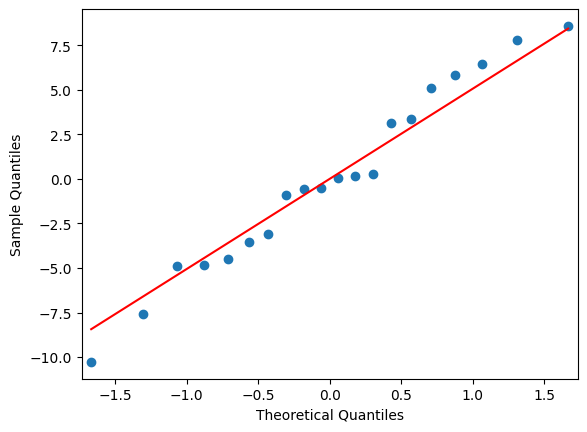

In [413]:
# this is code for making the qqplot

# get the predicted values from the model
y_hat = model.predict(x)  
# calculate the residuals 
residuals = y -y_hat
# generate the qq plot and put a line through the points to help us visualize the relationship here    
sm.qqplot(residuals, line ='s') 
# 
py.show() 


### Model Summary

So the other way that we assess a model is how well does it fit the data.  There are several different measurements that tell us how well the model fits.  

#### Correlation
The first of these we've already seen which is the correlation.  Python has several ways to calculate the correlation, below we'll see two of them.   Note that the usual correlation is sometimes called Pearson's correlation coefficient and the usual notation is $r$.  

In [414]:
#here we are using the numpy package
r= np.corrcoef(monkey['age'], monkey['pf'])[0, 1]
print (r)

-0.9336126663058333


In [415]:
# here we are using the scipy package
corr, pvalue=scipy.stats.pearsonr(monkey['age'], monkey['pf']) 
print(corr)

-0.9336126663058333


In [416]:
# here we are using pandas
monkey['age'].corr(monkey['pf'])

np.float64(-0.9336126663058333)

#### R-squared
The next measure of model fit is the 'coefficient of determination' or more colloquially 'r-squared' because the calculation
is to take the correlation, $r$, and square it.  Now this is a mathematical nicety that it works out that way.  $r^2$ has an 
important interpretation and that is 'the percent of the variation in the target that is explained by the linear model with x'.  

In [417]:
print(corr*corr)

0.8716326106866872


So taking the 'monkey' data we get an $r^2$ of $0.872$ or $87.2\%$ which means that 87.2 percent of the variation in the number of primordial follicles that a monkey has can be explained by their age.  

In [418]:
#Here's another method from the sklearn package 
from sklearn.metrics import r2_score
r2_score(y, y_hat)

0.8716326106866871

#### Root Mean Squared Error
The next measure of how well a model does is the 'root mean squared error' or RMSE.  To understand this metric, we need to go back to the calculation of the standard deviation.  That calculation is
$$s =\sqrt{ \frac{1}{n-1}\sum_{i=1}^n (y_i - \bar{y})^2}. $$

And that quantity, $s$, we interpret as the average difference from the mean.  

For a linear regression with a single predictor, the root mean squared error is $$s_e =\sqrt{\frac{1}{n-2}\sum_{i=1}^n (y_i-\hat{y_i})^2}. $$  A couple of things here: First, the part that is being squared is the residual.  Second, the part under the square root is a  sum that we are dividing by $n-2$ which is usually close to $n$ so it is like the mean of the squared errors.  Third, we are taking the square root, so putting those three together we get the 'root mean squared error' or RMSE.

We interpret the RMSE as the average difference between the observed values and the predicted values from our regression line.  So this is a measure as the average size of a residual or the average difference between an observation and the prediction line.

In [419]:
from sklearn.metrics import root_mean_squared_error
root_mean_squared_error(y, y_hat)

5.05583596603833

So, on average, the difference between the predicted number of primordial follicles and the observed number of primordial follicles is 5.06.  

### Predictions

Above we saw how to get the predicted values for the data that we observed.

In [420]:
# get the predicted values from the model
monkey['y_hat'] = model.predict(x) 
print(monkey)

    age   pf       y_hat
0   1.3  245  238.565756
1   7.7  190  194.853236
2   8.4  187  190.072179
3   5.7  208  208.513398
4   3.2  218  225.588601
5   3.4  232  224.222585
6   5.6  215  209.196406
7   3.1  216  226.271609
8   3.3  220  224.905593
9   5.5  215  209.879415
10  5.5  209  209.879415
11  7.1  199  198.951285
12  5.7  204  208.513398
13  7.3  197  197.585269
14  7.0  203  199.634293
15  7.7  198  194.853236
16  6.3  213  204.415350
17  7.7  195  194.853236
18  4.5  217  216.709496
19  7.6  192  195.536244


Now if we want to get predicted *pf* for when a monkey is 2.1 years of age or 3.0 or 5.9.

In [421]:
# make a dataframe for predictions at age is 2, 3 and 5
x_pred = pd.DataFrame({'age': [ 2.1, 3.0, 5.9]})
# code to have the model give us the predicted values at the ages in x_pred
model.predict(x_pred)

array([233.10169059, 226.95461753, 207.14738214])

These are the predicted values for age=2.1, 3.0 and 5.9 respectively.  

#### Extrapolation

One thing to be careful of is that linear regression like all models is not intelligent.  We can get the model to give us predictions that are not reasonable.  Extrapolation is the idea that we are extending the model beyond the range of our features.  In particular, we don't know that the linear relationship that we have when age is between 1.3 and 8.4 continues to hold for values of age outside that range.  It is likely that our predictions will be good when we move slightly beyond that range.  

In [422]:
x_pred2=pd.DataFrame({'age':[32,712,-4]})
model.predict(x_pred2)

array([   28.88226361, -4615.57293179,   274.76518572])

First the model gives us predictions for all three of the values for age.  The first value, $32$, might be a large age but it is clearly outside the range of our data and so that prediction is one that we should approach with skepticism.  An age of $712$ and an age of $-4$ both seem to be impossible for a monkey, and yet, the model gives us a value. 



### Inference about predictors

Make confidence intervals and doing hypothesis tests on the slope and y-intercept of our model are sometimes important for a linear regression with a single predictor.  

In [423]:
# we need another package to get this output
import statsmodels.api as sm

# for this particular model formulation we need to add a 
# column of 1's to the feature array
#add constant to predictor variables
x2 = sm.add_constant(x)

#fit linear regression model
model2 = sm.OLS(y, x2).fit()

#view model summary
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                     pf   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     122.2
Date:                Sun, 26 Jan 2025   Prob (F-statistic):           1.87e-09
Time:                        11:15:10   Log-Likelihood:                -60.790
No. Observations:                  20   AIC:                             125.6
Df Residuals:                      18   BIC:                             127.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        247.4449      3.706     66.770      0.0

There is quite a bit of output here but we only are interested in some pieces.  Note that the 'R-squared' here is what
we saw above.  The number of observations, $20$, is given by 'No. Observations.'  

The other things we will care a good deal about, for now, are in the table in the middle between the "====" lines that starts with *coef*, *std err*.  This table is a summary of the slope and intercept. The rows labels are 'const' and 'age' which correspond to the y-intercept and the slope respectively.  The column headings are 'coef', 'std err', 't', 'P>|t|', '[0.025', and '0.975]'.  

These are:

    *coef* is the estimate of the parameter

    *std err* is the standard error
    
    *t* is the test statistics for a hypothesis test of $=0$ vs $\neq 0$
    
    *P>|t|* is the p-value for the hypothesis test above
    
    *[0.025* is the lower end of a $95\%$ confidence interval for the parameter
    
    *0.975]* is the upper end of a $95\%$ confidence interval for the parameter

So that a $95\%$ confidence interval for the slope would be $(-8.13,-5.53)$.


Below is the code for making a general confidence interval for the slope:
        for df we use the *Df Residuals* from the output above
        for loc we use the *coef* for age from above
        for scale we use the *std err* for age from above



In [424]:

# confidence interval for a slope
lower, upper = st.t.interval(confidence=0.99, 
              df=18, 
              loc=-6.8301,  
              scale= 0.618) 
print(round(lower,2), round(upper,2))

-8.61 -5.05


Our interpretation is that for each additional year of age for a monkey we expect (or we predict) that the number of primordial follicles that the monkey has will drop between 8.61 and 5.05 follicles with 99% confidence.

Some notes:
    *Df Residuals* stands for degrees of freedom for residuals

    *coef* is short for coefficient which is a mathematical term for the quantity in front of a variable
    
    *std err* is short for standard error which is the estimated standard deviation

### Blue Jays

We'll now look at some data about Blue Jays, the birds.  

Details on the data can be found at this link:
[<https://rdrr.io/rforge/Stat2Data/man/BlueJays.html>]

We'll focus on predicting Blue Jay body mass in grams (*Mass*) from skull size in mm (*Skull*). 

In [425]:
bluejay = pd.read_csv("https://webpages.charlotte.edu/mschuck1/classes/DTSC2301/Data/BlueJays.csv", na_values=['NA'])
# remove rows with missing data
bluejay.dropna(inplace=True)
bluejay.head()



,Unnamed: 0,BirdID,KnownSex,BillDepth,BillWidth,BillLength,Head,Mass,Skull,Sex
0,1,0000-00000,M,8.26,9.21,25.92,56.58,73.30,30.66,1
1,2,1142-05901,M,8.54,8.76,24.99,56.36,75.10,31.38,1
2,3,1142-05905,M,8.39,8.78,26.07,57.32,70.25,31.25,1
3,4,1142-05907,F,7.78,9.30,23.48,53.77,65.50,30.29,0
4,5,1142-05909,M,8.71,9.84,25.47,57.32,74.90,31.85,1


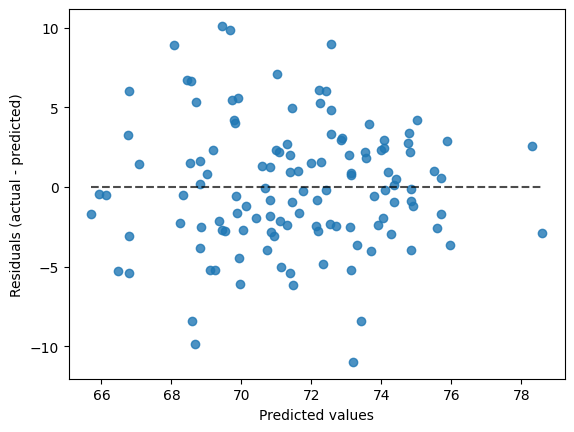

In [426]:
# In sklearn we first need to create a model object 
# and here it is a linear regression
bluejay_model1= LinearRegression()
# note below that the x needs to be a two dimensional array so we 
# need the double brackets here
bluejay_x=bluejay[['Skull']]
# y needs to be a one dimensional array so single brackets work
bluejay_y=bluejay['Mass']
bluejay_model1.fit(bluejay_x, bluejay_y)

bluejay_y_hat = bluejay_model1.predict(bluejay_x)
# below makes a 
display = PredictionErrorDisplay(y_true=bluejay_y, y_pred=bluejay_y_hat)
display.plot()
plt.show()

The above plot is pretty good.    So we can continue to use and evaluate this model.   


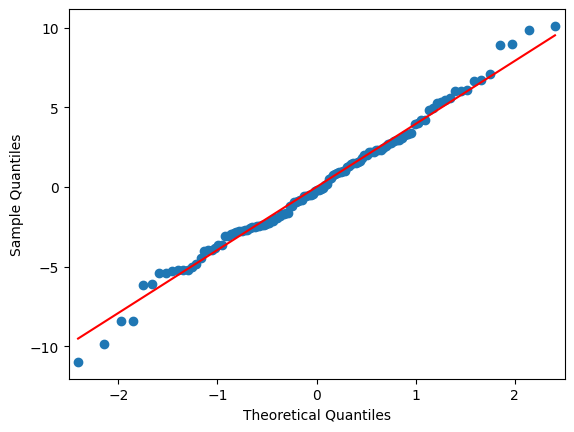

In [427]:
# this is code for making the qqplot

# get the predicted values from the model
bluejay_y_hat = bluejay_model1.predict(bluejay_x)  
# calculate the residuals 
bluejay_residuals = bluejay_y -bluejay_y_hat
# generate the qq plot and put a line through the points to help us visualize the relationship here    
sm.qqplot(bluejay_residuals, line ='s') 
# 
py.show() 

From the above qqplot, the points fall closely along the line so that condition for using the model seems to be met.

So next we will get the slope and y-intercept.

In [428]:
# for this particular model formulation we need to add a 
# column of 1's to the feature array
#add constant to predictor variables
bluejay_x2 = sm.add_constant(bluejay_x)

#fit linear regression model
bluejay_model2 = sm.OLS(bluejay_y, bluejay_x2).fit()

#view model summary
print(bluejay_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                   Mass   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     53.27
Date:                Sun, 26 Jan 2025   Prob (F-statistic):           3.35e-11
Time:                        11:15:10   Log-Likelihood:                -343.68
No. Observations:                 123   AIC:                             691.4
Df Residuals:                     121   BIC:                             697.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.1993     12.167     -1.414      0.1

So from the above output for our regresion, we get some useful information.

First, the prediction equation is $\hat{y} = -17.20 + 2.88$ bill_length_mm.  So our estimated slope is 2.88 and our estimated y-intercept is -17.20.  

This means that we would predict the body mass of a blue jay  with a skull size of zero mm to be -17.2g.  And for each additional millimeter of skull size that a blue jay has, we would predict that their body mass would be 2.88 grams larger.

The $r^2$ value here is 0.306 which indicates that $30.6\%$ of the variability in body mass of a blue jay can be explained by the relationship with their skull size.  

A couple of other things to highlight here: The p-value for the hypothesis test that the y-intercept is zero is $0.160$ which is large and so we can reasonably conclude that the y-intercept is not discernibly different from zero.  

Turning to the hypothesis test for the slope, we can reject the null hypothesis that the slope is zero since the p-value is small, $0.000$.  Thus, we can conclude that the slope is statistically discernible from zero.




### Another example

Let's return to the Ames Housing data

In [429]:
# read in the data to dataframe called ames
ames = pd.read_csv("https://webpages.charlotte.edu/mschuck1/classes/DTSC2301/Data/Ames_house_prices.csv", na_values=['?'])
# replace the ? in the data with NaN for missing values
ames.replace([' ?'],np.nan)
# show information about the dataframe
#ames.info()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


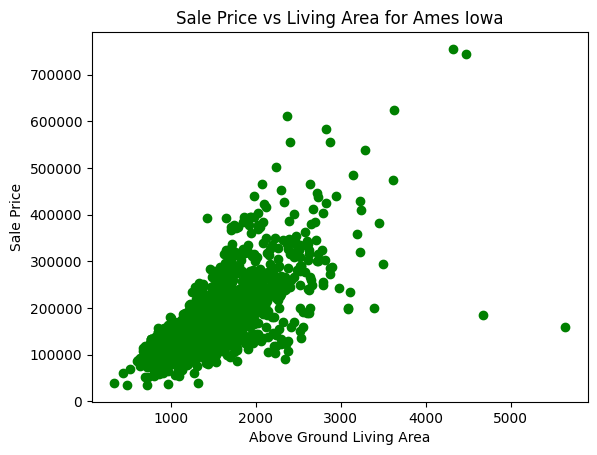

In [430]:
plt.scatter( ames['GrLivArea'],ames['SalePrice'], color="green")

# Add labels and title
plt.xlabel('Above Ground Living Area')
plt.ylabel('Sale Price')
plt.title('Sale Price vs Living Area for Ames Iowa')

# Show the plot
plt.show()

Before we described this 

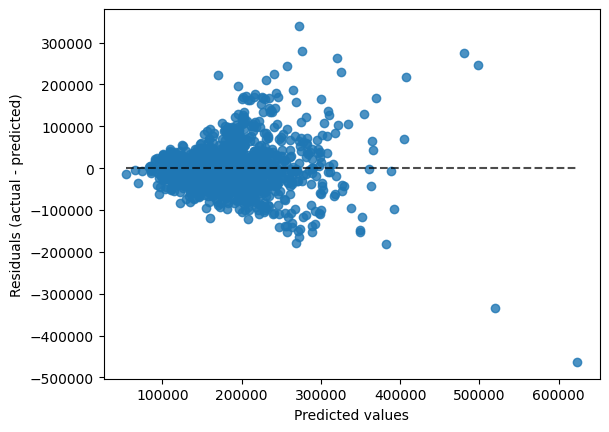

In [431]:
# In sklearn we first need to create a model object 
# and here it is a linear regression
ames_model= LinearRegression()
# note below that the x needs to be a two dimensional array so we 
# need the double brackets here
ames_x=ames[['GrLivArea']]
# y needs to be a one dimensional array so single brackets work
ames_y=ames['SalePrice']
ames_model.fit(ames_x, ames_y)

ames_y_hat = ames_model.predict(ames_x)
# below makes a 
display = PredictionErrorDisplay(y_true=ames_y, y_pred=ames_y_hat)
display.plot()
plt.show()

From the residual plot above we can see that the distribution of the residuals changes substantially for different 'Predicted values'.  This would suggest that this type of model is not appropriate, since one of the conditions for a linear regression model is to have consistent variability.  

This type of changing variability is called 'heteroskedastic'.  If the variability is non-changing as it was for the monkey data, then we say the residuals are 'homoskedastic'.

Since the conditions are not appropriate for this model, we will not use it further.

### Tasks

1. Using the Penguins data, fit a regression model to predict body mass using flipper length, and plot the residual plot and the qqplot.  What do they tell you about the regression model.

2. 

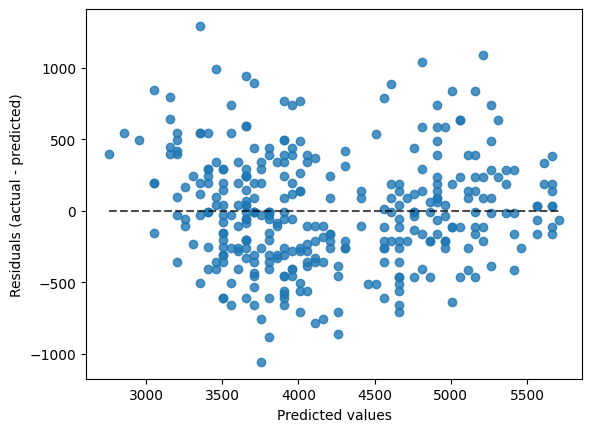

In [432]:
# In sklearn we first need to create a model object 
# and here it is a linear regression
penguins_model1= LinearRegression()
# note below that the x needs to be a two dimensional array so we 
# need the double brackets here
penguins_x=penguins[['flipper_length_mm']]
# y needs to be a one dimensional array so single brackets work
penguins_y=penguins['body_mass_g']
penguins_model1.fit(penguins_x, penguins_y)

penguins_y_hat = penguins_model1.predict(penguins_x)
# below makes a 
display = PredictionErrorDisplay(y_true=penguins_y, y_pred=penguins_y_hat)
display.plot()
plt.show()